In [113]:
from pandas import read_csv, unique
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_csv('C:/WISDM.csv', index_col=0)
df = df.drop(['user-id', 'timestamp'], axis=1)

Jogging = df[df['activity']=='Jogging'].head(4500)
Sitting = df[df['activity']=='Sitting'].head(4499)
Sitting['activity']=0
Jogging['activity']=1
new_df = pd.concat([Sitting,Jogging]).sample(frac=1).reset_index(drop=True)
new_df


,activity,X,Y,Z
0,0,-4.900000,-2.300000,7.886181
1,0,-5.430000,-2.180000,7.586533
2,0,-5.240000,-2.220000,7.736358
3,1,1.988571,5.175732,4.331271
4,0,3.260000,9.300000,1.144109
...,...,...,...,...
8994,0,3.210000,9.430000,1.116869
8995,1,-4.481094,-9.697687,-5.475380
8996,0,3.170000,9.300000,1.144109
8997,0,-4.900000,-2.260000,7.886181


In [115]:
X_train, X_test = train_test_split(new_df, test_size=0.2, random_state=42)
X_train = X_train[X_train.activity == 0]
X_train = X_train.drop(['activity'], axis=1)

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape, X_test.shape, y_test.shape


((3581, 3), (1800, 3), (1800,))

In [116]:
noise_factor = 0.50
X_train_AE_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

X_test_AE_noisy = X_test + noise_factor *  np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

In [117]:
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim, ))
encoder = Dense(2, activation="relu")(input_layer)
decoder = Dense(input_dim)(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_49 (Dense)            (None, 2)                 8         
                                                                 
 dense_50 (Dense)            (None, 3)                 9         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
from keras.callbacks import ModelCheckpoint, TensorBoard

nb_epoch = 200
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mse', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(X_train_AE_noisy, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=[checkpointer]).history

Epoch 1/200
101/101 [==============================] - 1s 3ms/step - loss: 24.7561 - accuracy: 0.6406 - val_loss: 21.7695 - val_accuracy: 0.8691
Epoch 2/200
101/101 [==============================] - 0s 2ms/step - loss: 19.7751 - accuracy: 0.9640 - val_loss: 18.4023 - val_accuracy: 0.9972
Epoch 3/200
101/101 [==============================] - 0s 2ms/step - loss: 17.2099 - accuracy: 1.0000 - val_loss: 16.5175 - val_accuracy: 1.0000
Epoch 4/200
101/101 [==============================] - 0s 1ms/step - loss: 15.7303 - accuracy: 1.0000 - val_loss: 15.4003 - val_accuracy: 1.0000
Epoch 5/200
101/101 [==============================] - 0s 1ms/step - loss: 14.8182 - accuracy: 1.0000 - val_loss: 14.6612 - val_accuracy: 1.0000
Epoch 6/200
101/101 [==============================] - 0s 1ms/step - loss: 14.1825 - accuracy: 1.0000 - val_loss: 14.1067 - val_accuracy: 1.0000
Epoch 7/200
101/101 [==============================] - 0s 1ms/step - loss: 13.6808 - accuracy: 1.0000 - val_loss: 13.6489 - val_ac

Epoch 58/200
101/101 [==============================] - 0s 1ms/step - loss: 2.9155 - accuracy: 1.0000 - val_loss: 2.9007 - val_accuracy: 1.0000
Epoch 59/200
101/101 [==============================] - 0s 2ms/step - loss: 2.8069 - accuracy: 1.0000 - val_loss: 2.7921 - val_accuracy: 1.0000
Epoch 60/200
101/101 [==============================] - 0s 2ms/step - loss: 2.7012 - accuracy: 1.0000 - val_loss: 2.6861 - val_accuracy: 1.0000
Epoch 61/200
101/101 [==============================] - 0s 2ms/step - loss: 2.5978 - accuracy: 1.0000 - val_loss: 2.5830 - val_accuracy: 1.0000
Epoch 62/200
101/101 [==============================] - 0s 1ms/step - loss: 2.4962 - accuracy: 1.0000 - val_loss: 2.4823 - val_accuracy: 1.0000
Epoch 63/200
101/101 [==============================] - 0s 1ms/step - loss: 2.3977 - accuracy: 1.0000 - val_loss: 2.3837 - val_accuracy: 1.0000
Epoch 64/200
101/101 [==============================] - 0s 2ms/step - loss: 2.3020 - accuracy: 1.0000 - val_loss: 2.2868 - val_accuracy:

Epoch 115/200
101/101 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 1.0000 - val_loss: 0.1091 - val_accuracy: 1.0000
Epoch 116/200
101/101 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 1.0000 - val_loss: 0.1034 - val_accuracy: 1.0000
Epoch 117/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0968 - accuracy: 1.0000 - val_loss: 0.1001 - val_accuracy: 1.0000
Epoch 118/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 1.0000
Epoch 119/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 1.0000 - val_loss: 0.0932 - val_accuracy: 1.0000
Epoch 120/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0857 - accuracy: 1.0000 - val_loss: 0.0890 - val_accuracy: 1.0000
Epoch 121/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 1.0000 - val_loss: 0.0859 - val_ac

101/101 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 172/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 173/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 174/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0426 - accuracy: 1.0000 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 175/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 1.0000
Epoch 176/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 177/200
101/101 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 1.0000

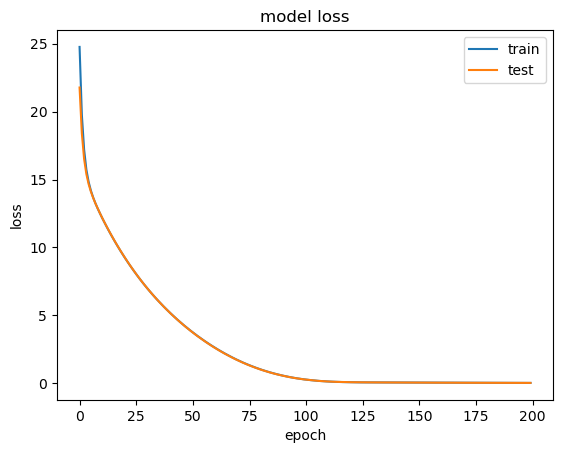

In [119]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [120]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

57/57 [==============================] - 0s 777us/step


,reconstruction_error,true_class
count,1800.000000,1800.000000
mean,17.288959,0.490000
std,29.776696,0.500039
min,0.000041,0.000000
25%,0.013553,0.000000
50%,0.113479,0.000000
75%,26.979133,1.000000
max,283.436894,1.000000


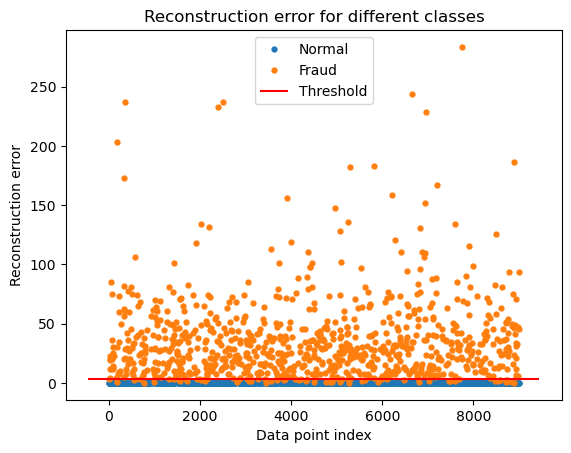

In [121]:
threshold = 2.9
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

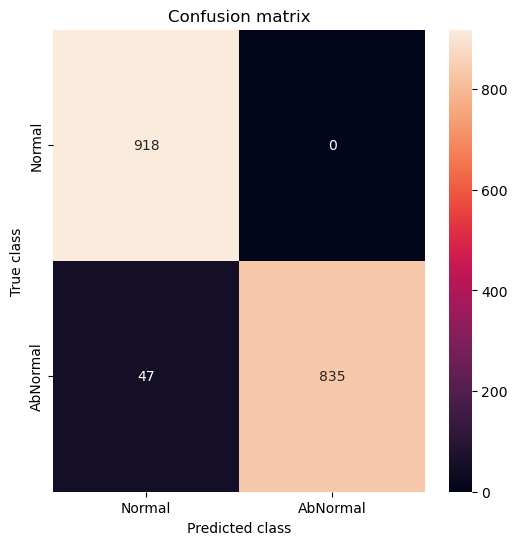

In [122]:
LABELS = ["Normal", "AbNormal"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [123]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.9738888888888889
Precision : 1.0
Recall : 0.9467120181405896
F1 : 0.972626674432149
